In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data_f_loops = pd.read_csv('common_paths_f.csv')
data_f_no_loops = pd.read_csv('common_paths_f_nl.csv')

In [47]:
def matrix_common_paths(data):  
    # Extract transitions and create transition counts
    transitions = {}
    for _, row in data.iterrows():
        path = row['Category Path'].split(" -> ")
        count = row['Count']
        for i in range(len(path) - 1):
            from_cat = path[i]
            to_cat = path[i + 1]
            if from_cat not in transitions:
                transitions[from_cat] = {}
            if to_cat not in transitions[from_cat]:
                transitions[from_cat][to_cat] = 0
            transitions[from_cat][to_cat] += count

    # Create transition matrix DataFrame
    categories = sorted(set([key for key in transitions] + [k for subdict in transitions.values() for k in subdict]))
    transition_matrix = pd.DataFrame(0, index=categories, columns=categories)

    # Populate the transition matrix with counts
    for from_cat, to_cats in transitions.items():
        for to_cat, count in to_cats.items():
            transition_matrix.at[from_cat, to_cat] = count
    
    return transition_matrix

In [48]:
matrix_loops = matrix_common_paths(data_f_loops)

Text(0.5, 1.0, 'Total transitions to each category')

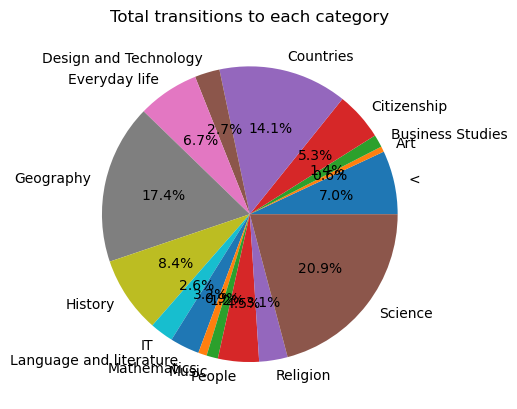

In [49]:
total_transitions_to = matrix_loops.sum()

# plot a pie chart of the matrix_with_sums
fig, ax = plt.subplots()
ax.pie(total_transitions_to, labels=total_transitions_to.index, autopct='%1.1f%%')
ax.set_title('Total transitions to each category')

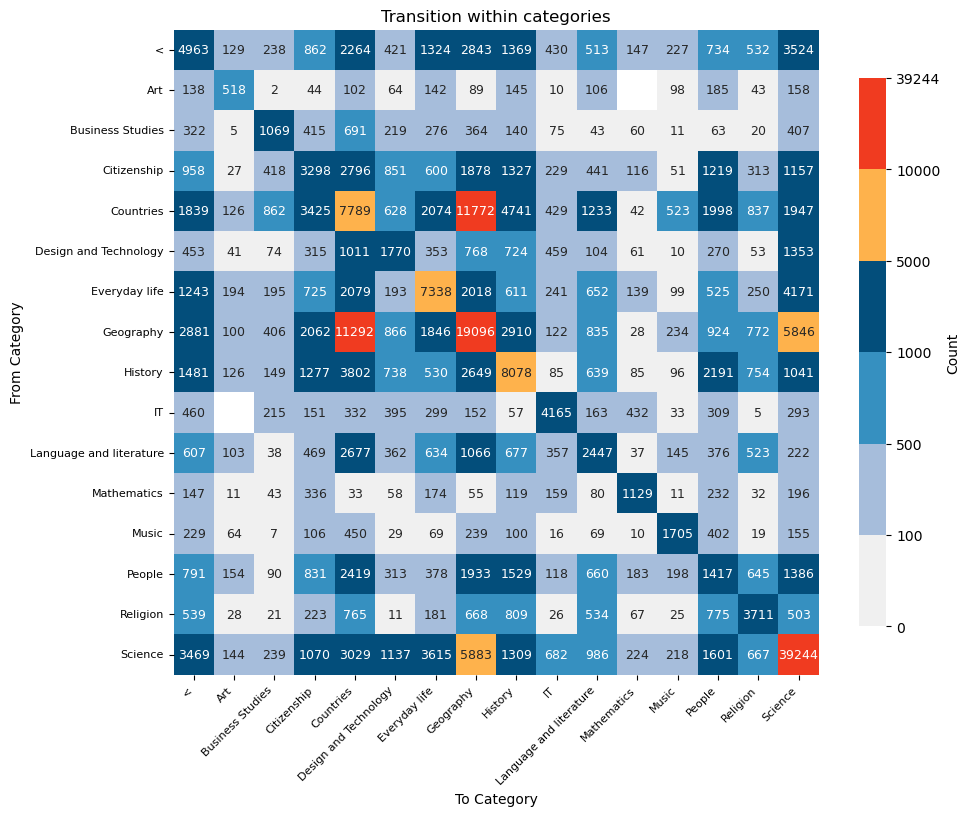

In [55]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Get max value for setting the color scale
max_value = matrix_loops.values.max()

# Define thresholds and corresponding colors
thresholds = [0, 100, 500, 1000, 5000, 10000, max_value]  # Adjust based on data range
colors = ["#f0f0f0", "#a6bddb", "#3690c0", "#034e7b", "#feb24c", "#f03b20"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(thresholds, len(colors))


plt.figure(figsize=(10, 10))

# Mask zeros for better visibility in log scale
mask = matrix_loops == 0
sns.heatmap(matrix_loops, annot=True, annot_kws={"size": 9}, fmt="d", 
            mask=mask, cmap=cmap, norm=norm, cbar_kws={'label': 'Count', 'shrink': 0.6} , square=True)
plt.title('Transition within categories')
plt.xlabel('To Category')
plt.ylabel('From Category')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8) 

plt.tight_layout()
plt.show()